In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pmdarima as pm

In [2]:
!curl -O https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  1598  100  1598    0     0   1480      0  0:00:01  0:00:01 --:--:--  1485


In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv',
                index_col='Month',
                skipfooter=2,
                parse_dates=True,
                engine='python')

In [5]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [6]:
df.columns=['Sales']

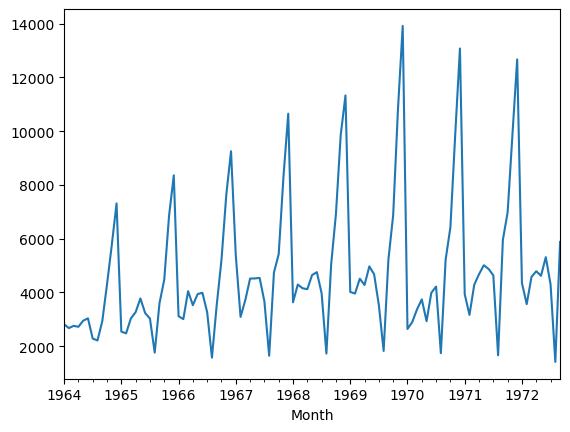

In [7]:
df['Sales'].plot();

<Axes: xlabel='Month'>

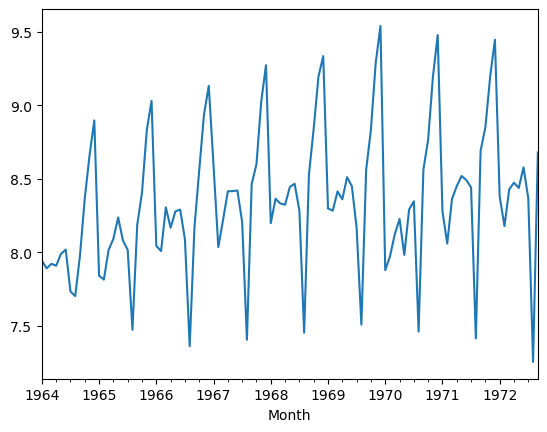

In [8]:
df['LogSales']=np.log(df['Sales'])
df['LogSales'].plot()

In [9]:
df.index.freq='MS'

In [11]:
Ntest=12
train=df.iloc[:-Ntest]
test= df.iloc[-Ntest:]

In [12]:
# Boolean series to index df rows
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [13]:
model = pm.auto_arima(train['LogSales'],
                     trace=True,
                     suppress_warnings=True,
                     seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.522, Time=2.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=1.00 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.52 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.93 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.53 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.41 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=0.63 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.14 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

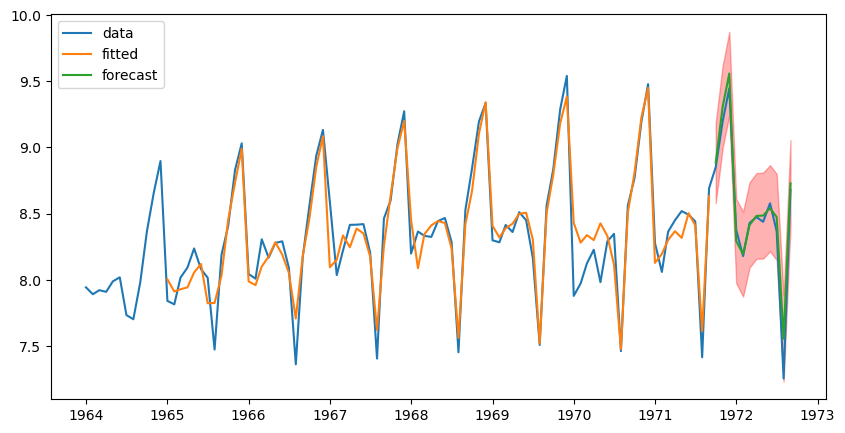

In [14]:
# Since the model is seasonal, we won't plot or preduct the first 12 values
# since pmdarima will set them to 0
train_pred=model.predict_in_sample(start=12,end=-1)
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogSales'],label='data')
ax.plot(train.index[12:],train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

In [15]:
# Compute R^2
r2_score(test['Sales'],np.exp(test_pred))

0.9546643581766661

In [16]:
# Best non-seasonal model for gridsearch
model=pm.auto_arima(train['LogSales'],
                   trace=True,
                   max_p=12,max_q=2,max_order=14,
                   suppress_warnings=True,
                   stepwise=False,
                   seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.19 

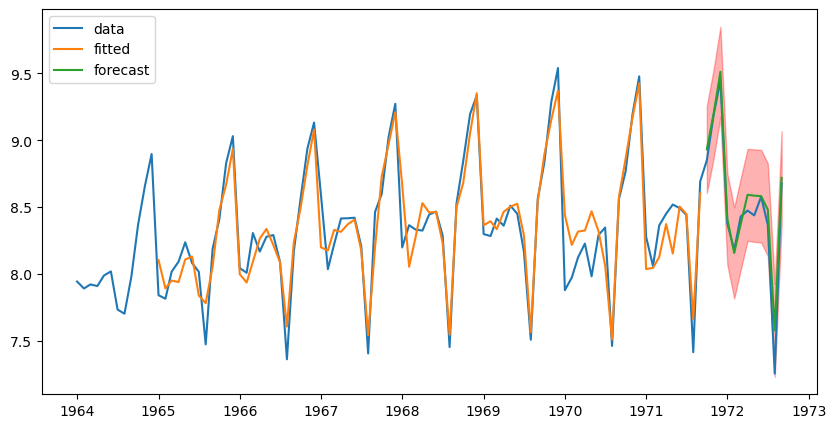

In [17]:
# Since the model is seasonal, we won't plot or preduct the first 12 values
# since pmdarima will set them to 0
train_pred=model.predict_in_sample(start=12,end=-1)
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogSales'],label='data')
ax.plot(train.index[12:],train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,
               confint[:,0],confint[:,1],\
               color='red',alpha=0.3)
ax.legend();

In [18]:
# Compute R^2
r2_score(test['Sales'],np.exp(test_pred))

0.9722211612277546

In [19]:
# Choosing ARIMA model manually by choosing ACF and PACF
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

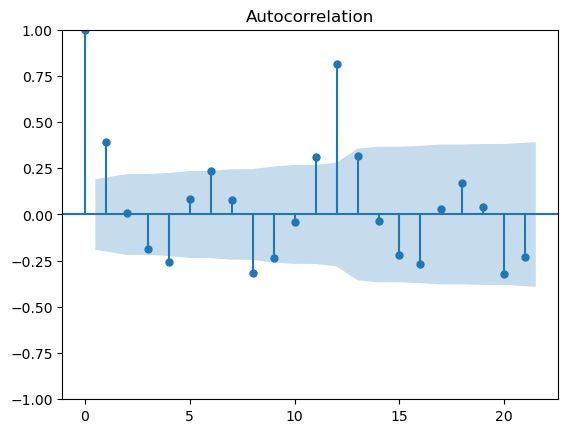

In [20]:
plot_acf(df['LogSales']);

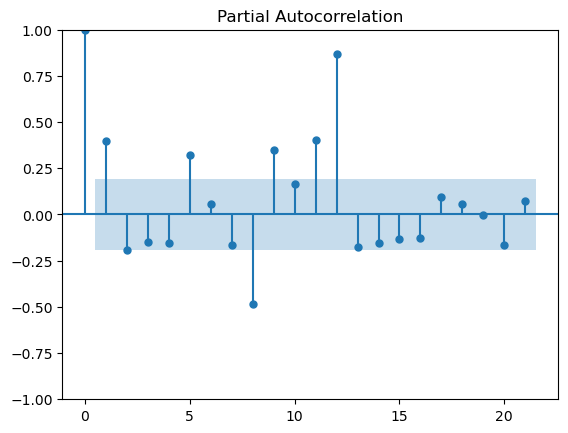

In [22]:
plot_pacf(df['LogSales'],method='ols');

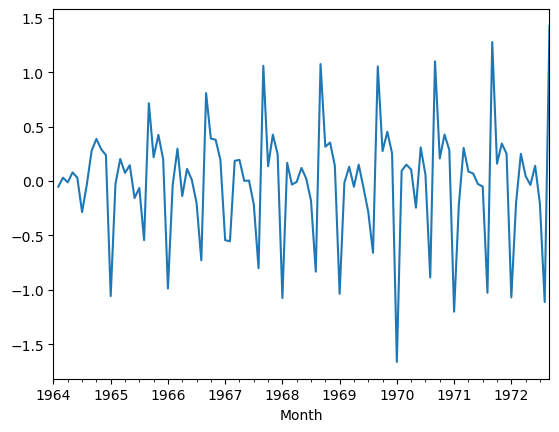

In [23]:
df['LogSales'].diff().plot();

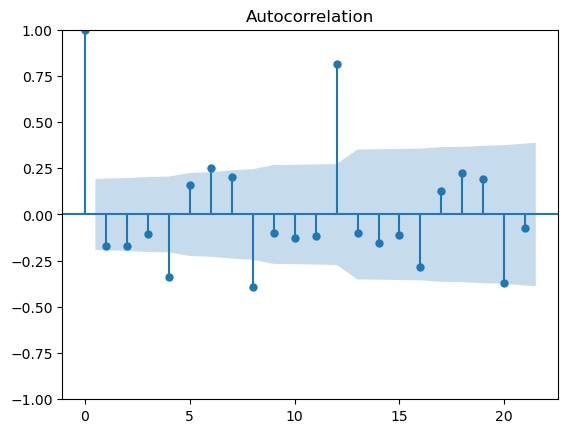

In [24]:
plot_acf(df['LogSales'].diff().dropna());

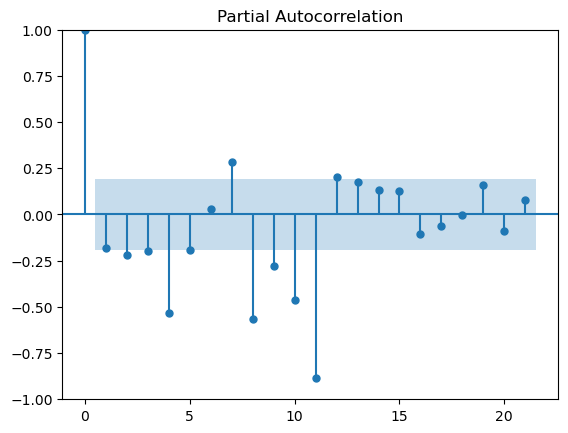

In [26]:
plot_pacf(df['LogSales'].diff().dropna(),method='ols');

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adfuller(df['LogSales'])

(-2.2551186012844275,
 0.18685173111687303,
 13,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -49.19143751582993)

In [29]:
adfuller(df['LogSales'].diff().dropna())

(-4.460914465253635,
 0.00023121404649535773,
 12,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -43.63799632128652)

In [30]:
# from previous
def plot_fit_and_forecast(result,d=0,col='Sales'):
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(df[col],label='data')
    
    # plot the curve fitted on train set
    train_pred=result.fittedvalues
    ax.plot(train.index[d:],train_pred[d:],color='green',label='fitted')
    
    #forecast the test set
    prediction_result=result.get_forecast(Ntest)
    conf_int=prediction_result.conf_int()
    lower,upper=conf_int[f'lower {col}'],conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,\
                   lower,upper,\
                   color='red',alpha=0.3)
    ax.legend()
    
    return forecast

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


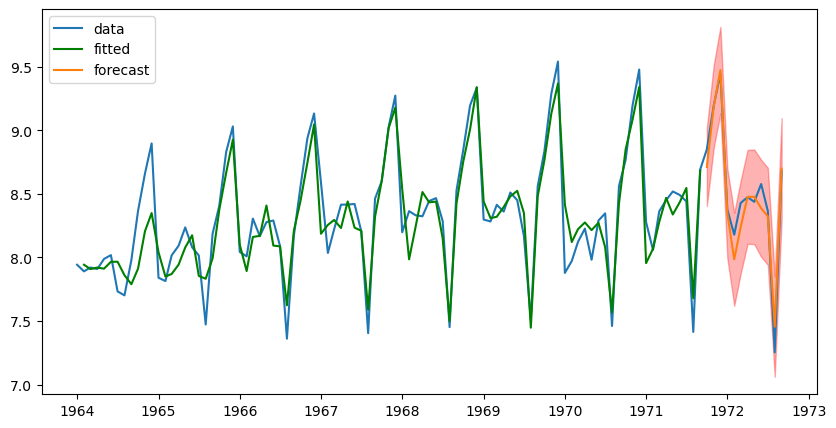

In [31]:
arima = ARIMA(train['LogSales'],order=(12,1,12))
arima_result=arima.fit()
forecast=plot_fit_and_forecast(arima_result,d=1,col='LogSales')

In [32]:
r2_score(test['Sales'],np.exp(forecast))

0.9691147719100194